<center><a target="_blank" href="https://colab.research.google.com/github/ishanavasthi/aerofit-analysis/blob/main/analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a></center>

<center><a target="_blank" href="https://colab.research.google.com/github/ishanavasthi/aerofit-analysis/blob/main/analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a></center>

# **Introduction to Project**
## About
**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.
## Business Problem
The market research team at Aerofit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
## Agendas
- Perform descriptive analytics to create a customer profile for each Aerofit treadmill product by developing appropriate tables and charts.
- For each Aerofit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Dataset
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

| Parameter | Values |
| ---- | ---- |
| Product Purchased: | KP281, KP481, or KP781 |
| Age: | In years |
| Gender: | Male/ Female |
| Education: | In years |
| Martial Status: | Single or Partnered |
| Usage: | The average number of times the customer plans to use the treadmill each week |
| Income: | Annual Income (in $) |
| Fitness: | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent |
| Miles: | The average number of miles the customer expects to walk/run each week |
Dataset Link : [Here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

## Product Portfolio
- The KP281 is an entry-level treadmill that sells for \$1,500.
- The KP481 is for mid-level runners that sell for \$1,750.
- The KP781 treadmill is having advanced features that sell for $2,500.
---

# Initial Setup
Downloading the CSV file using `wget` command.

In [27]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

--2024-03-20 18:19:17--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.110, 18.164.173.18, 18.164.173.117, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv.1’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 18:19:17 (3.09 GB/s) - ‘aerofit_treadmill.csv.1’ saved [7279/7279]



# Data Analysis

Importing python libraries and reading the file into an object named `df`.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

df = pd.read_csv('aerofit_treadmill.csv')
print("The data type of each column in the DataFrame:")
print(df.dtypes)

print("The dimensions of the DataFrame:")
df.shape

The data type of each column in the DataFrame:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object
The dimensions of the DataFrame:


(180, 9)

Three columns, Product, Gender, and Marital Status, contain string data types. All other columns contain integer data types. There are 9 data categories and 180 values for each category.

In [29]:
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


Output clearly indicates that none of the columns in our DataFrame have missing values.

In [30]:
print("The first 5 rows of the DataFrame:")
print(df.head())

The first 5 rows of the DataFrame:
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [31]:
print("Statistics for each numerical column:")
df.describe()

Statistics for each numerical column:


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations -**
- Over half of the customers have a fitness score of 3.
- On average, customers earn approximately $53,720.
- Treadmill users average 3.45 uses per week.
- The average distance customers travel on the treadmill is 103 miles.
- About a quarter of the customers have a fitness score of 4.
- Mean age of customers is 28 years.
- On average, a customer has an education of 15 years with maximum and minimum being 12 and 21 years respectively.

In [32]:
print('---------------------------------------')
print(df['Fitness'].value_counts(normalize=True))
print('---------------------------------------')
print(df['Usage'].value_counts(normalize=True))
print('---------------------------------------')
print(df['Product'].value_counts(normalize=True))
print('---------------------------------------')
print(df['Gender'].value_counts(normalize=True))
print('---------------------------------------')
print(df['MaritalStatus'].value_counts(normalize=True))
print('---------------------------------------')

---------------------------------------
3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64
---------------------------------------
3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64
---------------------------------------
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64
---------------------------------------
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
---------------------------------------
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64
---------------------------------------


**Observations -**
- Over half of the customers rated their fitness level as 3, with 5 and 2 being the next most common ratings.
- Around 38% of people reported using treadmills 3 times a week. 4 times and 2 times per week were the next most frequent usages.
- The KP281 is the most popular product, followed by the KP481 and KP781.
- Men are the most common purchasers of Aerofit products.
- Married people purchased more Aerofit products than single people.

In [33]:
print(f"There are {df.duplicated().sum()} duplicated values!")


There are 0 duplicated values!


# Graphical Analysis

<ipython-input-34-aec52ca1fdfb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


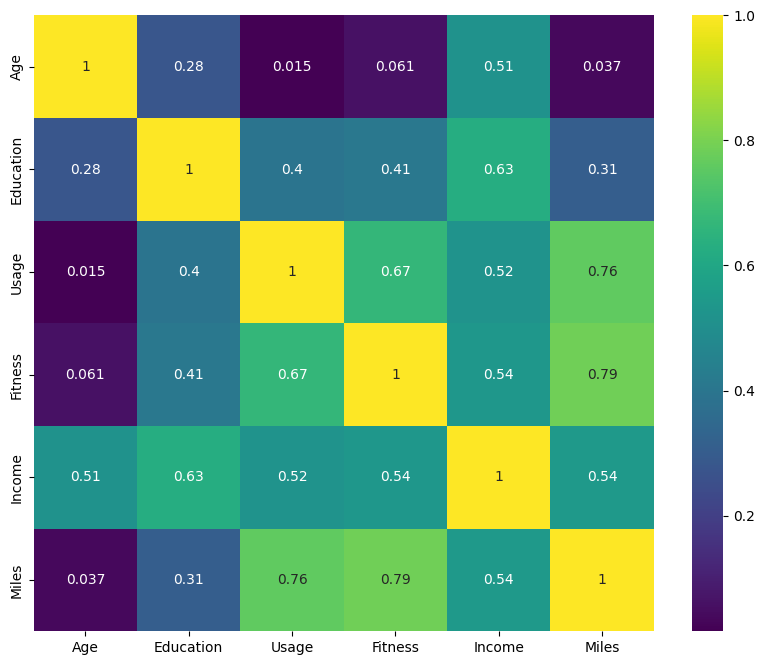

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

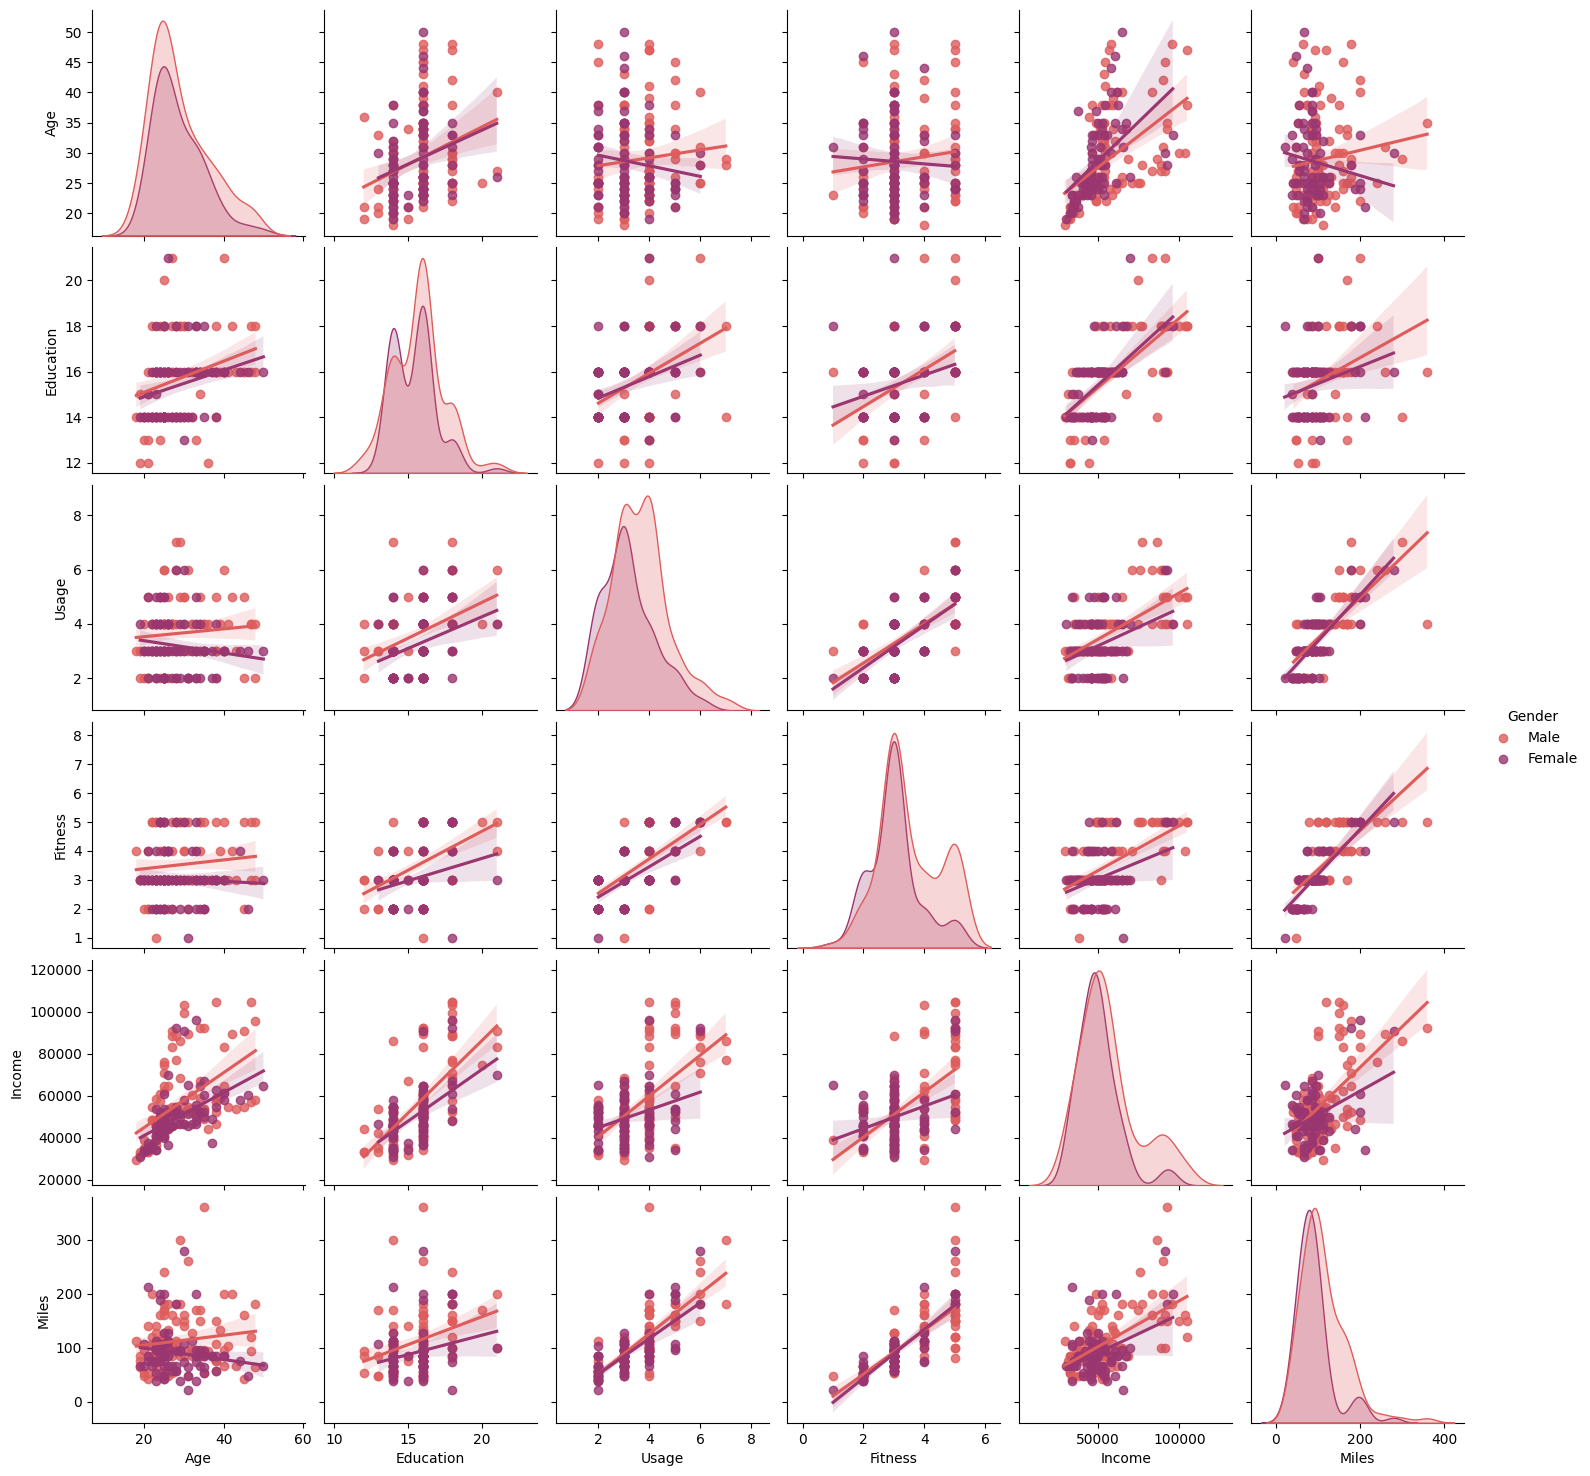

In [35]:
rcParams['figure.figsize'] = 20, 7
sns.pairplot(df, palette='flare', hue='Gender', kind='reg')
plt.show()

**Observations -**
- Age and income have a moderate positive correlation (0.51).
  - This means as age increases, income tends to increase as well, but the relationship is not very strong.
- Education and income have a strong positive correlation (0.63).
  - People with higher education levels tend to have significantly higher incomes.
- Usage and fitness have a strong positive correlation (0.67).
  - People who use the equipment more frequently tend to have higher fitness levels.
- Usage and income have a moderate positive correlation (0.52).
  - There is a connection between higher usage and higher income, but it's not as strong as the link between usage and fitness.
- Usage and miles walked/ran have a very strong positive correlation (0.76).
  - People who use the equipment more tend to walk or run significantly farther distances.
- Fitness and income have a moderate positive correlation (0.54).
  - There is a connection between higher fitness levels and higher income, but it's not as strong as some other correlations.
- Fitness and miles walked/ran have a very strong positive correlation (0.79).
  - People with higher fitness levels tend to walk or run significantly farther distances.
- Income and miles walked/ran have a moderate positive correlation (0.54).
  - There is a connection between higher income and walking or running farther, but it's not as strong as some other correlations.

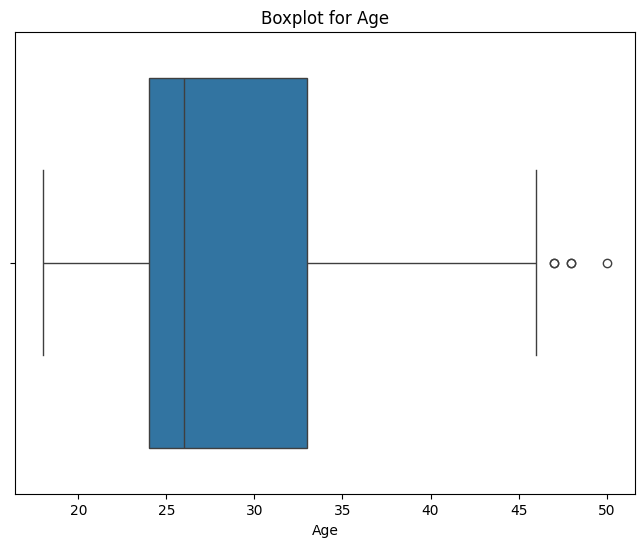

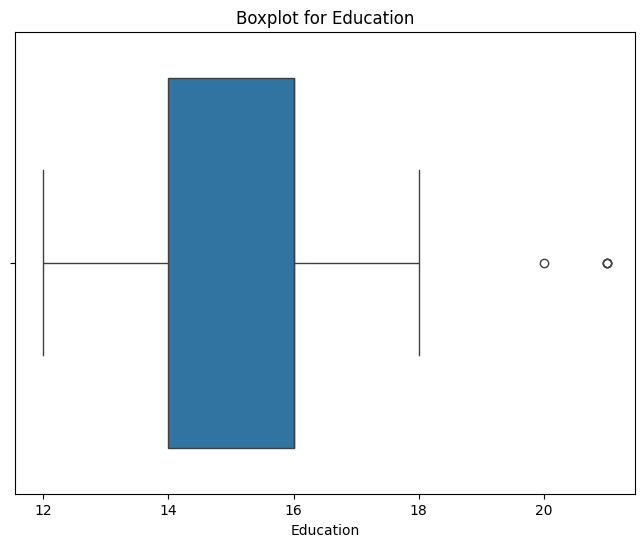

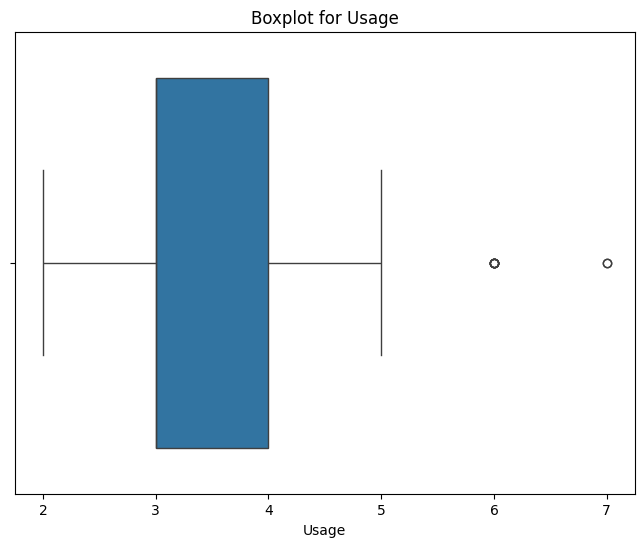

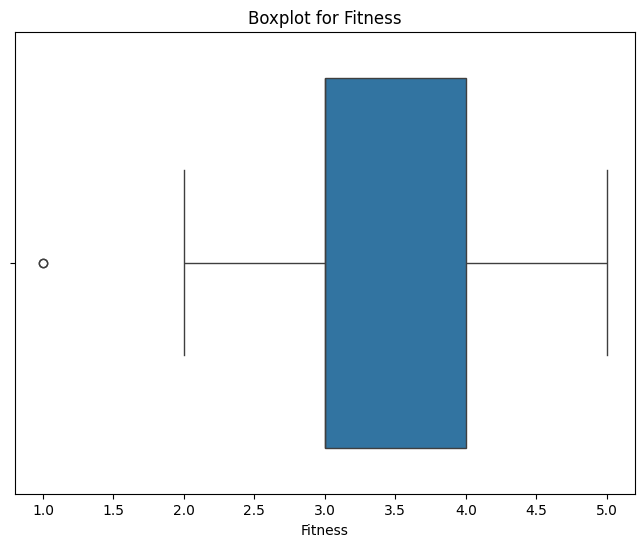

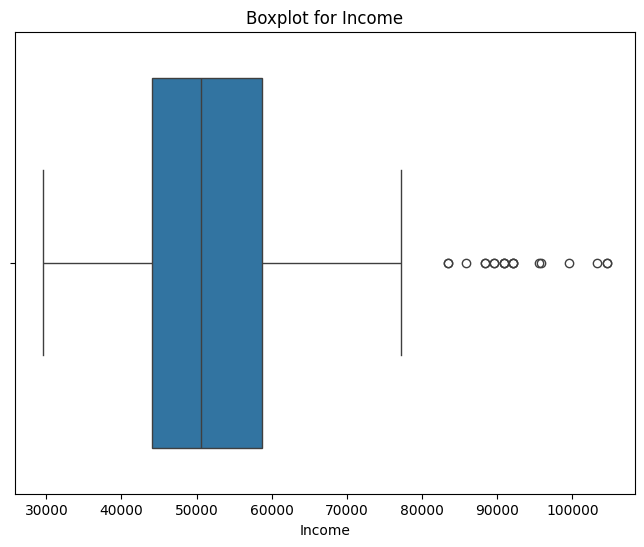

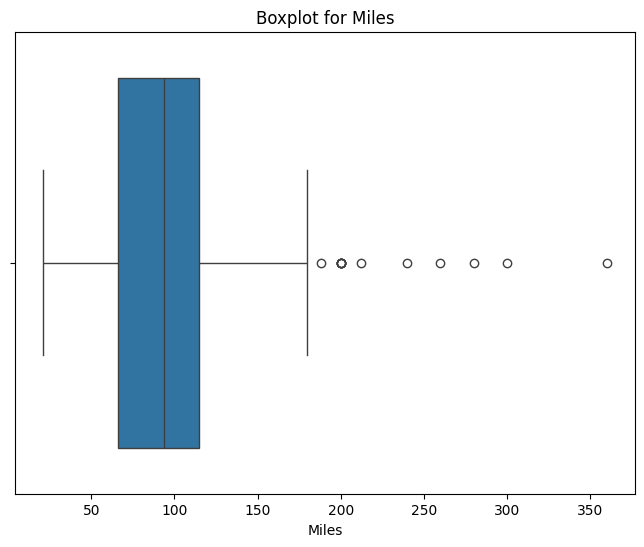

In [36]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

**Observations -**

- Most of the treadmills buyers fall in the range of 24 - 34 years of age, with least with age more than 45.
- Most of the buyers have an education of 14-16 years.
- Majority people only use the treadmill 3-4 times a week. Very few people use it daily.
- Most people rate themselves as 3 or 4 in fitness levels.
- People who buy most treadmills fall in the income bracket of 45K\$ - 58K\$.
- Most people expect to walk/run 60 - 125 miles in a week.

In [37]:
for col in numerical_cols:

    lower_limit = df[col].quantile(0.05)
    upper_limit = df[col].quantile(0.95)

    df[col] = np.clip(df[col], lower_limit, upper_limit)

print(df)

    Product    Age  Gender  Education MaritalStatus  Usage  Fitness    Income  \
0     KP281  20.00    Male         14        Single   3.00        4  34053.15   
1     KP281  20.00    Male         15        Single   2.00        3  34053.15   
2     KP281  20.00  Female         14     Partnered   4.00        3  34053.15   
3     KP281  20.00    Male         14        Single   3.00        3  34053.15   
4     KP281  20.00    Male         14     Partnered   4.00        2  35247.00   
..      ...    ...     ...        ...           ...    ...      ...       ...   
175   KP781  40.00    Male         18        Single   5.05        5  83416.00   
176   KP781  42.00    Male         18        Single   5.00        4  89641.00   
177   KP781  43.05    Male         16        Single   5.00        5  90886.00   
178   KP781  43.05    Male         18     Partnered   4.00        5  90948.25   
179   KP781  43.05    Male         18     Partnered   4.00        5  90948.25   

     Miles  
0      112  
1

**Observations -**
- Education levels range from 14 to 18 years, which corresponds to different levels of formal education (e.g., high school, bachelor's degree, master's degree).
- The 'Usage' column has values ranging from 2.0 to 5.05, which represents different levels of product usage or engagement.
- Income values range from around \$34,000 to \$90,000, indicating a diverse range of customer income levels.

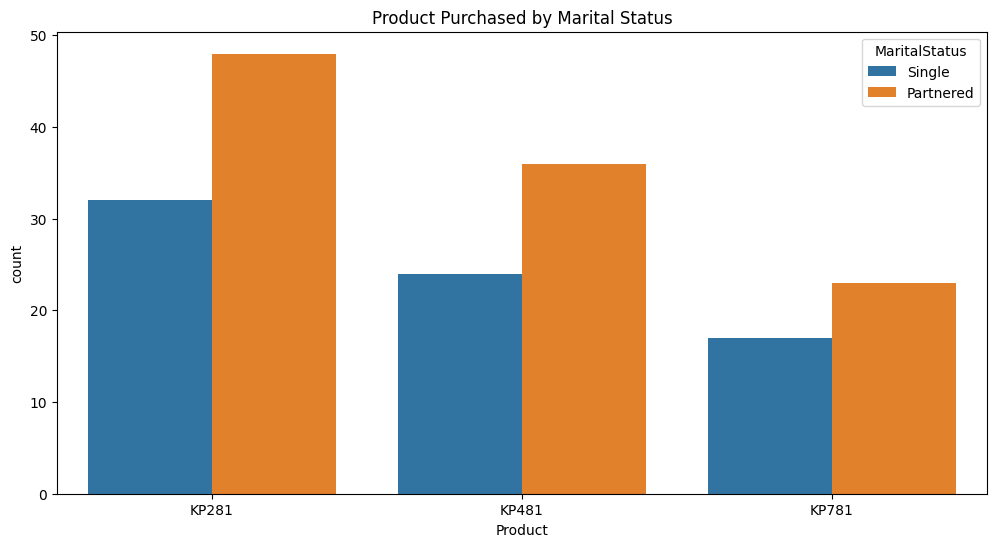

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Product Purchased by Marital Status')
plt.show()

**Observations -**
- Couples are more likely to buy treadmills than single people.

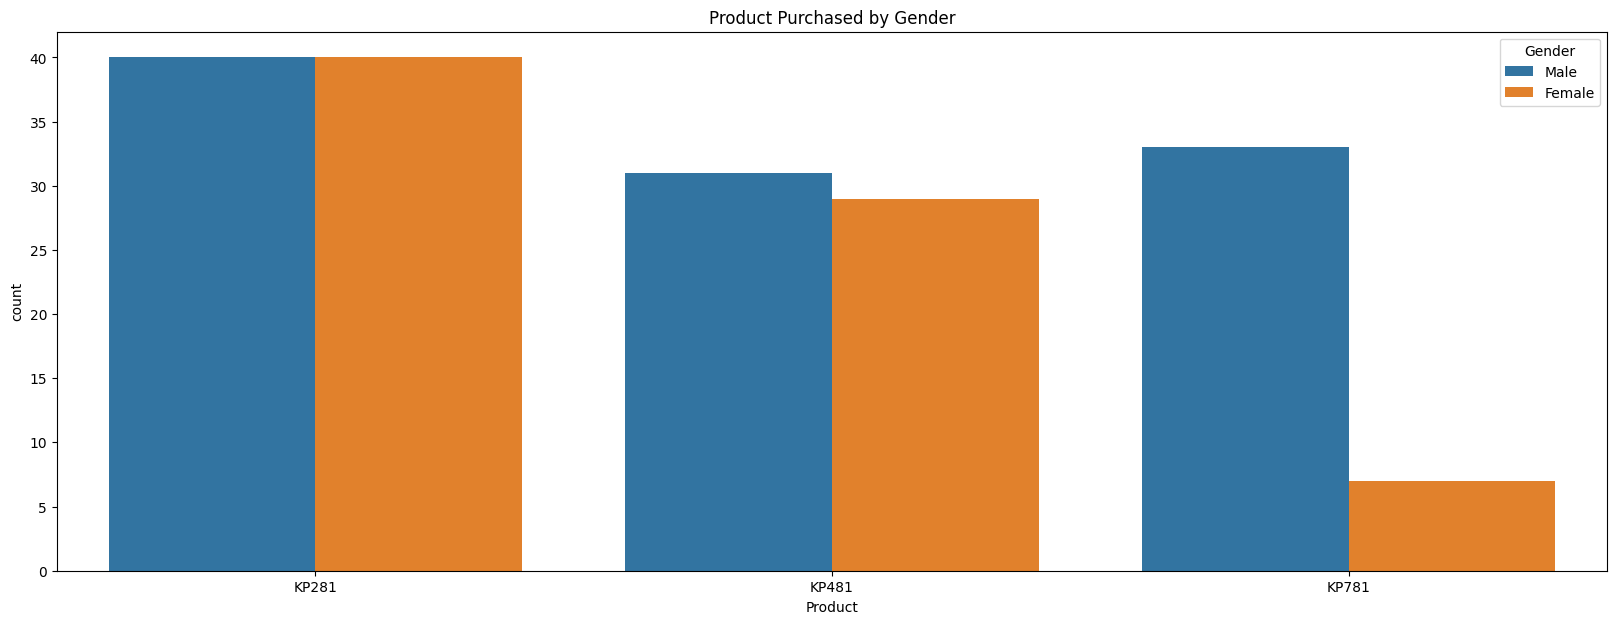

In [39]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product Purchased by Gender')
plt.show()

**Observations -**
- _KP281_ is owned by equal number of men and women.
- Men own the _KP481_ model slightly more.
- Very few females buy _KP781_ variant of the treadmill.

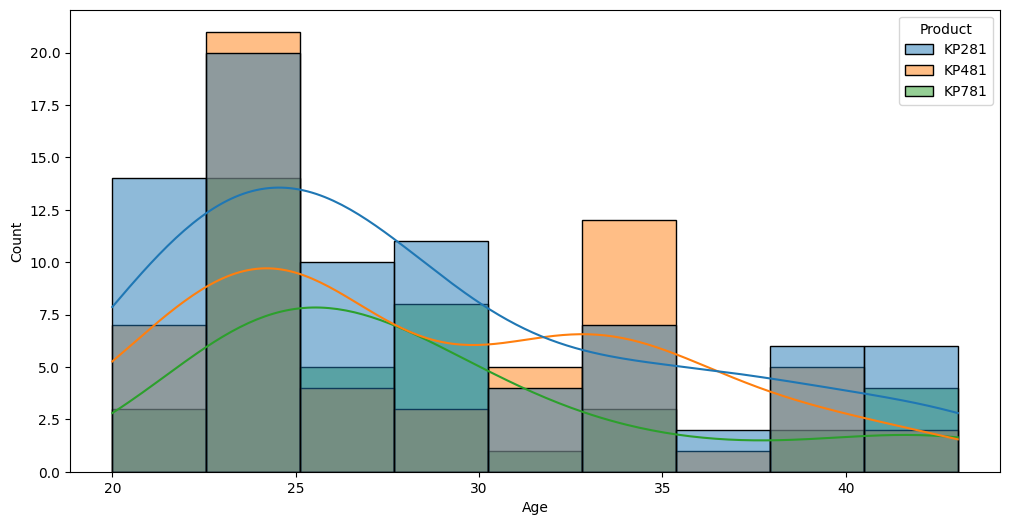

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Product', kde=True)
plt.show()

**Observations -**
- Most treadmills are owned by people in age group 20-25.
- Least treadmills are owned by people in age group 35-40.

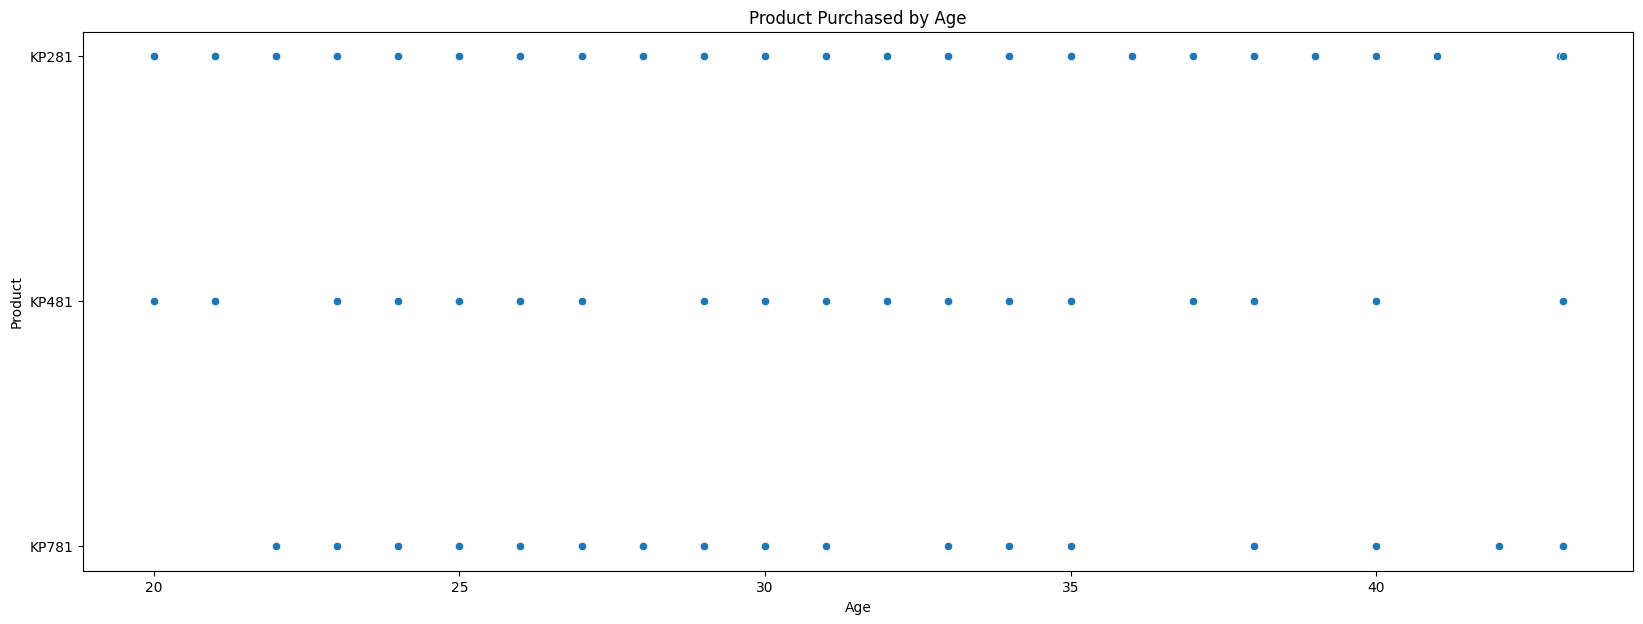

In [41]:
sns.scatterplot(x='Age', y='Product', data=df)
plt.title('Product Purchased by Age')
plt.show()


**Observations -**
- _KP281_ is owned by almost every people of age group from 20-45.
- _KP481_ is majorly owned by people from age group 30-25.
- _KP781_ is majorly owned by 22-30 year olds.

# Bivariate Analysis


In [48]:
print('---------------------------------------')
print(df.groupby('Product')['Income'].mean())
print('---------------------------------------')
print(df.groupby('Product')['Usage'].mean())
print('---------------------------------------')
print(df.groupby('Product')['Fitness'].mean())
print('---------------------------------------')

---------------------------------------
Product
KP281    46584.31125
KP481    49046.60750
KP781    73908.28125
Name: Income, dtype: float64
---------------------------------------
Product
KP281    3.087500
KP481    3.066667
KP781    4.511250
Name: Usage, dtype: float64
---------------------------------------
Product
KP281    2.975000
KP481    2.916667
KP781    4.625000
Name: Fitness, dtype: float64
---------------------------------------


**Observations -**
1. KP281 is the most popular choice for both men and women.
2. There's a significant gender imbalance in KP781 purchases, with males buying it in much higher numbers.
3. The gender breakdown for KP481 is relatively balanced.
4. Sales data shows a higher preference for KP781 among males compared to KP481.

# Representing Probabilities

In [42]:
product_counts = pd.crosstab(index=df['Product'], columns='count')
print('Count of each product:')
print(product_counts)

marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True)
print('Marginal probability:')
print(marginal_prob)


product_percentages = (product_counts / len(df)) * 100
print('Percentages of Products:')
print(product_percentages)

Count of each product:
col_0    count
Product       
KP281       80
KP481       60
KP781       40
Marginal probability:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222
Percentages of Products:
col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


**Observations -**
- Most bought treadmill is _KP281_. 4.4 out of 10 people buy this model.
- Least bought treadmill is _KP781_. Only 2.2 out of 10 people buy this variant.
- _KP481_ is owned by 33% people.

In [43]:
conditional_prob = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], normalize='columns')
print("Probability of buying a product based on Marital Status:")
print(conditional_prob)

Probability of buying a product based on Marital Status:
MaritalStatus  Partnered    Single
Product                           
KP281           0.448598  0.438356
KP481           0.336449  0.328767
KP781           0.214953  0.232877


**Observations -**
- Probabilty of a single person buying _KP781_ is 0.232877.
- Probabilty of a married person buying _KP281_ is highest 0.448598.

In [44]:
conditional_prob_2 = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='index')
print("Conditional probability given Gender:")
print(conditional_prob_2)


Conditional probability given Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


**Observations -**
- Probabilty of a Female buying _KP781_ is 0.0921 i.e. lowest.
- Probabilty of a Male buying _KP281_ is highest 0.526.

<ipython-input-45-bd96bf709ed5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


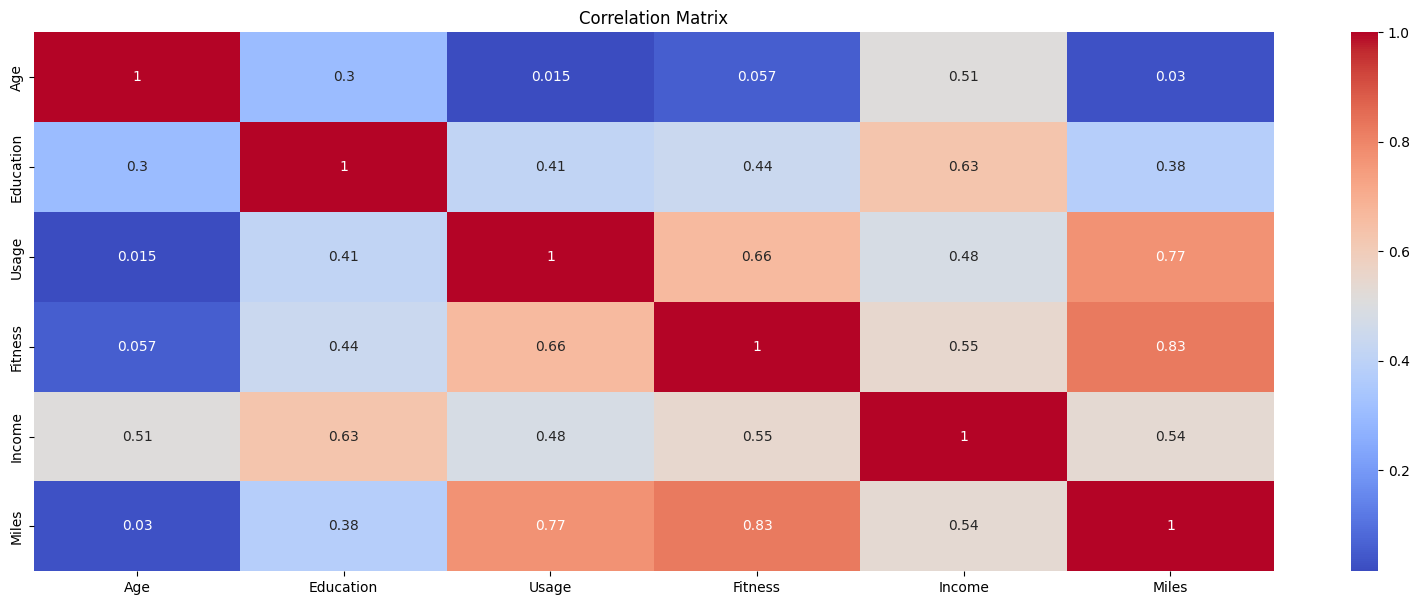

In [45]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Customer Profiling -

In [46]:
kp281_profile = df[df['Product'] == 'KP281'][['Age', 'Gender', 'Income']]
kp481_profile = df[df['Product'] == 'KP481'][['Age', 'Gender', 'Income']]
kp781_profile = df[df['Product'] == 'KP781'][['Age', 'Gender', 'Income']]

print("Customer profiling for KP281:")
print(kp281_profile.describe())
print("Customer profiling for KP481:")
print(kp481_profile.describe())
print("Customer profiling for KP781:")
print(kp781_profile.describe())


Customer profiling for KP281:
             Age        Income
count  80.000000     80.000000
mean   28.427500  46584.311250
std     6.678313   8813.246103
min    20.000000  34053.150000
25%    23.000000  38658.000000
50%    26.000000  46617.000000
75%    33.000000  53439.000000
max    43.050000  68220.000000
Customer profiling for KP481:
             Age        Income
count  60.000000     60.000000
mean   28.801667  49046.607500
std     6.327830   8517.583361
min    20.000000  34053.150000
25%    24.000000  44911.500000
50%    26.000000  49459.500000
75%    33.250000  53439.000000
max    43.050000  67083.000000
Customer profiling for KP781:
             Age        Income
count  40.000000     40.000000
mean   28.828750  73908.281250
std     6.296182  16572.164368
min    22.000000  48556.000000
25%    24.750000  58204.750000
50%    27.000000  76568.500000
75%    30.250000  90886.000000
max    43.050000  90948.250000


**Observations -**
- KP781 customers have the highest average income at \$73,908, followed by KP481 at \$49,047 and KP281 at \$46,584.
- The age distributions are fairly similar across the three groups, with mean ages ranging from 28.4 to 28.8 years old.
- KP781 has the widest income spread, with a much higher 75th percentile income of \$90,886 compared to the other groups.
- KP281 has the tightest income distribution, with the smallest standard deviation of \$8,813.
- The minimum ages are consistent at 20-22 years old, while the maximum ages top out at 43 years old across all groups.
- The median incomes increase progressively from KP281 (\$46,617) to KP481 (\$49,460) to KP781 (\$76,569).

# Recommendations -
- KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K \$. These models should promote as budget treadmills.
As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.
- Based on the analysis, Aerofit can tailor marketing strategies to target specific customer segments for each product.
- Focus on promoting KP781 to customers with higher income and education levels.
- Offer personalized recommendations based on customer profiles to enhance customer satisfaction and retention.
- We should run a marketing campaign on Women's Day and Mother's day to encourage more women to exercise.
- Given the wider range of features offered by the KP781, this treadmill might be best marketed towards professional athletes and fitness enthusiasts.